# **XAI**
#### Explainable AI

In [1]:
######## Ensuring the notebook reloads modules automatically
%load_ext autoreload
%autoreload 2
%matplotlib inline

# **Code from the study:**
>Dodo, Y., Arif, K., Alyami, M. et al. Estimation of compressive strength of waste concrete utilizing fly ash/slag in concrete with interpretable approaches: optimization and graphical user interface (GUI). Sci Rep 14, 4598 (2024). [DOI](https://doi.org/10.1038/s41598-024-54513-y).

>[Source code also available](https://github.com/Kiranarif001/Paper-data/blob/main/Code)

### Code Quick Links:
1. [Load Dataset](#load-dataset)
2. [Pre-processing](#pre-processing)
3. [Training 1: MLRegressor](#training-1-mlpregressor) + [Performance Metrics 1](#prediction-metrics---mlpregressor)
5. [Training 2: AdaBoostRegressor](#training-02-adaboostregressor) + [Performance Metrics 2](#)
7. [SHAP](#shap)

## Load Dataset

In [2]:
######### Import 3-party libraries #####################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

### Learners chosen by authors
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor #ANN Variant
from sklearn.ensemble import BaggingRegressor   #for ANN-Bagging
from sklearn.ensemble import AdaBoostRegressor  #for ANN-AdaBoost
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

########################################################


In [3]:
######################################################## Importing the dataset
WM = pd.read_csv('Data.csv')
WM

FA   GGBS   Fine  Coarse  NaOH  Na2SiO3     SP  NaOH.1  Temp  \
0    252.0  108.0  774.0  1090.8  46.3    115.7  144.0       8    30   
1    252.0  108.0  774.0  1090.8  51.4    128.6  144.0       8    30   
2    252.0  108.0  774.0  1090.8  56.6    141.4  144.0       8    30   
3    252.0  108.0  774.0  1090.8  61.7    154.3  144.0       8    30   
4    294.0  126.0  810.6   966.0  54.0    135.0  168.0       8    30   
..     ...    ...    ...     ...   ...      ...    ...     ...   ...   
151  102.0  307.0  554.0  1293.0  41.0    102.0    0.0      10     0   
152    0.0  409.0  554.0  1293.0  41.0    102.0    0.0      10     0   
153    0.0  400.0  740.0  1110.0  12.9     82.5    0.0       0    22   
154    0.0  400.0  785.0  1085.0  12.9     82.5    0.0       0    22   
155    0.0  400.0  790.0  1065.0  12.9     82.5    0.0       0    22   

     Compressive strength   
0                    33.83  
1                    36.19  
2                    31.11  
3                    25.71  
4                    36.69  
..                     ...  
151                  55.50  
152                  58.60  
153                  34.60  
154                  53.60  
155                  66.70  

[156 rows x 10 columns]

## Pre-processing

In [4]:
######################################################### Display data description
print("Data Description:")
print(WM.describe())

Data Description:
               FA        GGBS        Fine       Coarse        NaOH    Na2SiO3  \
count  156.000000  156.000000  156.000000   156.000000  156.000000  156.00000   
mean   252.464744  151.439103  729.802564  1096.028205   60.463205  122.98359   
std     86.271245   86.733311   67.974529   117.852906   26.840910   35.70806   
min      0.000000    0.000000  547.000000   966.000000    9.000000   54.00000   
25%    216.000000  101.250000  683.000000   972.000000   47.000000   93.00000   
50%    270.000000  135.000000  760.500000  1090.800000   57.100000  115.72000   
75%    303.750000  180.000000  774.000000  1211.500000   70.700000  150.00000   
max    400.000000  409.000000  810.600000  1293.000000  143.300000  192.90000   

               SP      NaOH.1        Temp  Compressive strength   
count  156.000000  156.000000  156.000000             156.000000  
mean    77.567949    8.564103   28.076923              42.716218  
std     80.983271    3.894048   20.552541          

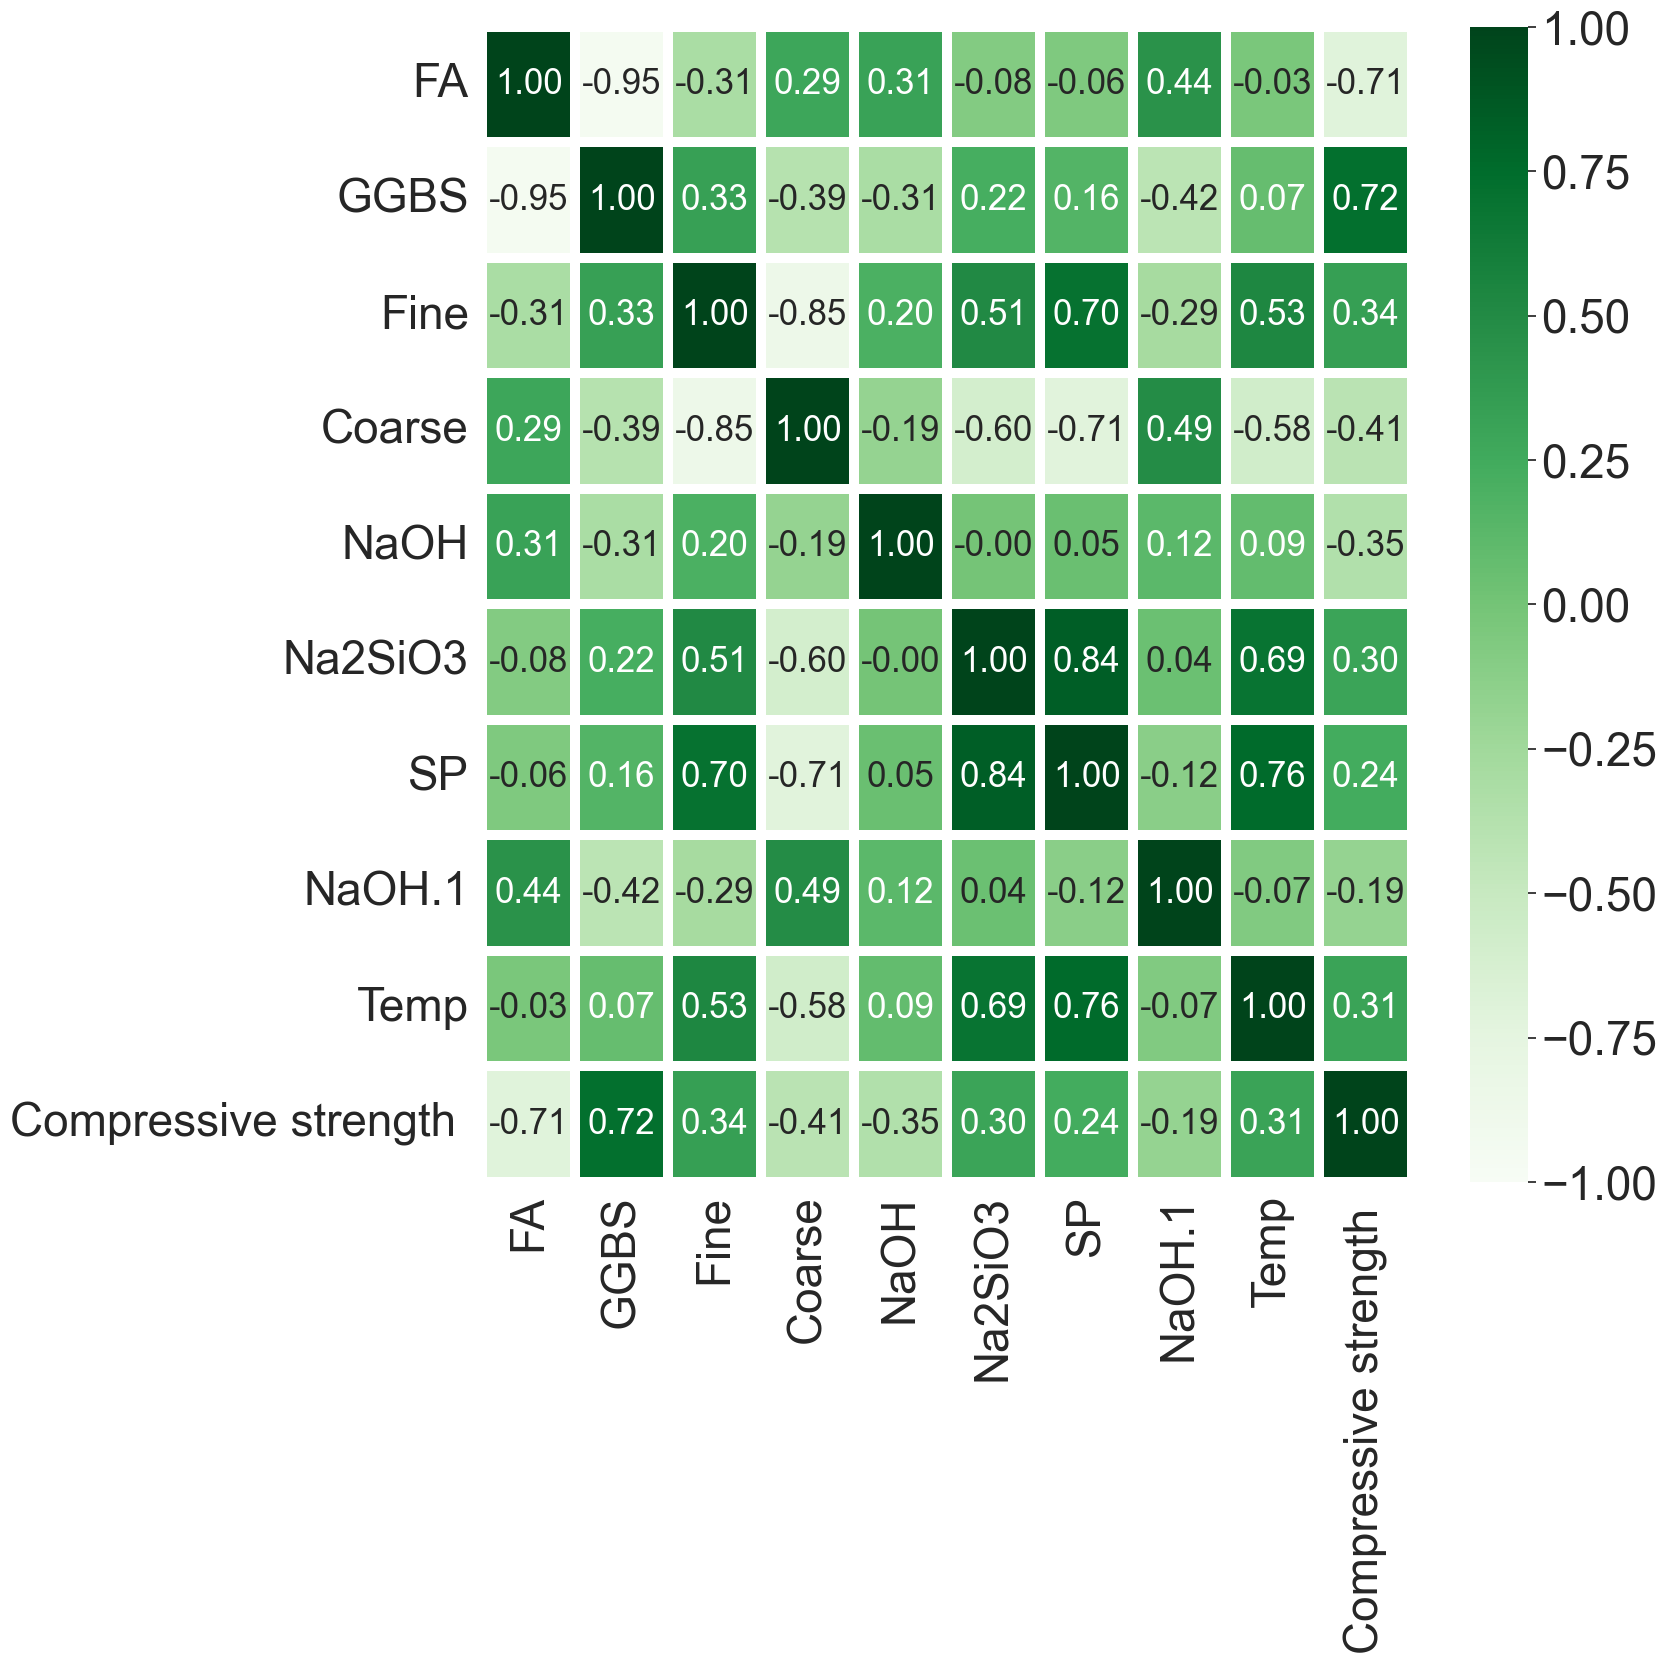

In [5]:
######################################################## Visualize Correlation b/w features
# Pairplot
sns.set(font_scale=3)
relation = sns.pairplot(WM, kind="reg", height=10)

# Heatmap
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(
    WM.corr(), 
    cmap="Greens", 
    annot=True, 
    fmt='.2f', 
    vmin=-1, 
    vmax=+1, 
    linewidths=6,
    linecolor='white',
    annot_kws={"size": 25}
)
plt.show()

## Training 1: MLPRegressor

In [6]:
########################################################### Splitting into train set and test set
X = WM.iloc[:, :-1].values
y = WM.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

################################################ Define the parameter grid for MLPRegressor hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(20,), (50,), (100,), (20, 20), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

### Grid Search
> Optimized parameters used are directly copied from what study said; 
grid search disabled: too long to find/confirm optimal parameters

In [31]:
# Initialize the MLPRegressor
regressor= MLPRegressor(hidden_layer_sizes=(20,20),activation="relu",solver='adam',alpha=0.0001,batch_size=32,learning_rate="constant",learning_rate_init=0.001,max_iter=10000)

# GridSearchCV to find the best hyperparameters
#grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2')
#grid_search.fit(X_train, y_train)

# Best hyperparameters
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

# Train MLPRegressor with best hyperparameters
best_regressor = MLPRegressor(hidden_layer_sizes=(14),activation="relu",solver='adam',alpha=0.0001,batch_size=32,learning_rate="constant",learning_rate_init=0.1,max_iter=250)
best_regressor.fit(X_train, y_train)
y_pred_best = best_regressor.predict(X_test)

## Prediction Metrics - MLPRegressor

In [33]:
# R^2 Score with best hyperparameters
R_value_best = r2_score(y_test, y_pred_best)

#print("Best Hyperparameters for MLPRegressor:", best_params)
print("Best R^2 Score (after hyperparameter tuning):", R_value_best)

Best R^2 Score (after hyperparameter tuning): 0.6500399780817494


## Training 02: AdaBoostRegressor

In [34]:
# Define the parameter grid for AdaBoostRegressor hyperparameter tuning
adb_param_grid = {
    'n_estimators': [10, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 0.9],
    'loss': ['linear', 'square', 'exponential']
}

# Initialize the AdaBoostRegressor with base estimator MLPRegressor
adb_regressor = AdaBoostRegressor(estimator=best_regressor)

In [35]:
# GridSearchCV to find the best hyperparameters for AdaBoostRegressor
adb_grid_search = GridSearchCV(adb_regressor, adb_param_grid, cv=5, scoring='r2')
adb_grid_search.fit(X_train, y_train)

# Best hyperparameters for AdaBoostRegressor
best_adb_params = adb_grid_search.best_params_
best_adb_score = adb_grid_search.best_score_

c:\Users\buce_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\buce_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\buce_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\buce_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the opti

In [36]:
# Train AdaBoostRegressor with best hyperparameters
best_adb_regressor = AdaBoostRegressor(
    estimator=best_regressor, 
    n_estimators=best_adb_params['n_estimators'], 
    learning_rate=best_adb_params['learning_rate'], 
    loss=best_adb_params['loss']
)
best_adb_regressor.fit(X_train, y_train)
y_pred_best_adb = best_adb_regressor.predict(X_test)

# R^2 Score with best hyperparameters for AdaBoostRegressor
R_value_best_adb = r2_score(y_test, y_pred_best_adb)

print("Best Hyperparameters for AdaBoostRegressor:", best_adb_params)
print("Best R^2 Score for AdaBoostRegressor (after hyperparameter tuning):", R_value_best_adb)

Best Hyperparameters for AdaBoostRegressor: {'learning_rate': 0.9, 'loss': 'square', 'n_estimators': 150}
Best R^2 Score for AdaBoostRegressor (after hyperparameter tuning): 0.7217901946178978


In [ ]:
# Perform k-fold cross-validation for MLPRegressor
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
cv_scores_mlp = cross_val_score(best_regressor, X_train, y_train, cv=kfold, scoring='r2')

print("Mean R^2 Score (MLPRegressor) with 10-fold Cross Validation:", np.mean(cv_scores_mlp))

In [38]:
# Perform k-fold cross-validation for AdaBoostRegressor
cv_scores_adb = cross_val_score(best_adb_regressor, X_train, y_train, cv=kfold, scoring='r2')
cv_scores_adb_scores = cross_val_score(best_adb_regressor, X_test, y_test, cv=10, scoring= 'neg_mean_absolute_error')
cv_scores_adb_scores1 = cross_val_score(best_adb_regressor, X_test, y_test, cv=10, scoring= 'neg_mean_squared_log_error')
cv_scores_adb_scores2 = cross_val_score(best_adb_regressor, X_test, y_test, cv=10, scoring= 'neg_root_mean_squared_error')

c:\Users\buce_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\buce_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\buce_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\buce_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the opti

In [39]:
print("Mean R^2 Score (MLPRegressor) with 10-fold Cross Validation:", np.mean(cv_scores_mlp))
print("Mean R^2 Score (AdaBoostRegressor) with 10-fold Cross Validation:", np.mean(cv_scores_adb))

Mean R^2 Score (MLPRegressor) with 10-fold Cross Validation: 0.42421884405479415
Mean R^2 Score (AdaBoostRegressor) with 10-fold Cross Validation: 0.45822506201431396


# **SHAP**

In [41]:
import shap
shap.initjs()

model = best_regressor

# SHAP analysis using KernelExplainer
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first instance in the test set
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0])

# Summary plot for all the instances in the test set
#shap.summary_plot(shap_values, X_test)



Using 124 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/32 [00:00<?, ?it/s]

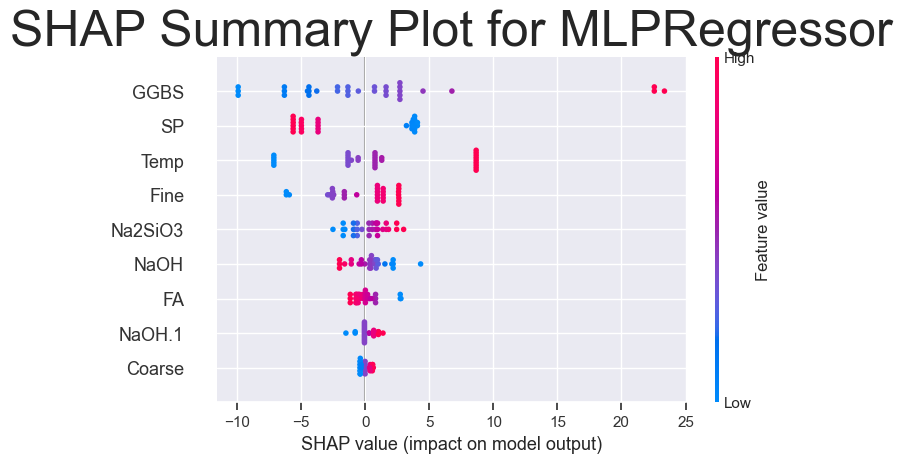

In [26]:
# Summary plot

Features1 = ['$FA$', '$GGBFS$', '$FINEAGG$', '$COARSEAGG$', '$NaOH$', '$Na2SiO3$', '$SP$', '$NaOHM$', '$Temp$']

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=WM.columns[:-1], show=False)
plt.title('SHAP Summary Plot for MLPRegressor')
plt.show()
